In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_df = pd.read_csv('./data/BostonHousing.csv')

In [6]:
housing_df = housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'})

In [13]:
housing_df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0


In [11]:
corr = housing_df.corr()

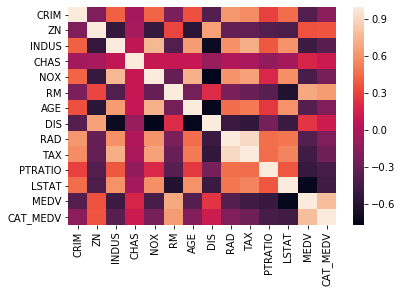

In [12]:
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns)

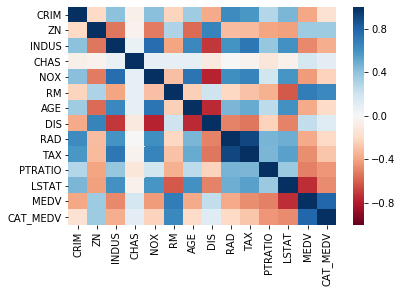

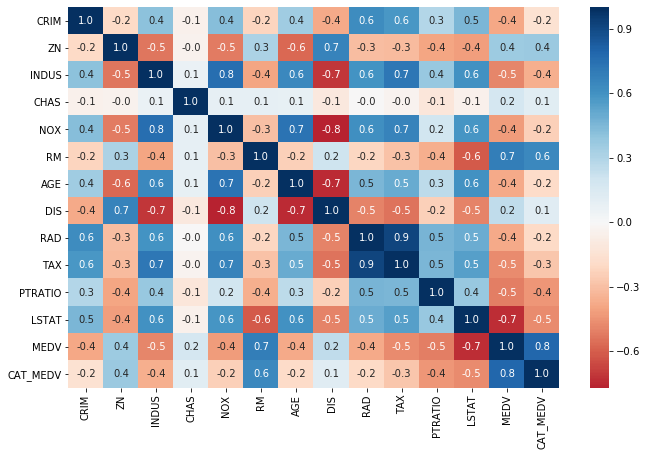

In [16]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns, vmin=-1, vmax=1, cmap='RdBu')
# Include information about values (example demonstrate how to control the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu',
center=0, ax=ax)

In [36]:
housing_df.RM

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [54]:
bostonHousing_df = pd.read_csv('./data/BostonHousing.csv')

In [55]:
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM,
range(0, 10), labels=False)

In [57]:
medvgroupby = bostonHousing_df.groupby(['RM_bin', 'CHAS']).MEDV.mean()
medvgroupby

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [58]:
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'})

In [61]:
pd.pivot_table(bostonHousing_df, values='MEDV', index=
['RM_bin'], columns=['CHAS'],
aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [62]:
# use method crosstab to create a cross-tabulation of two variables
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV,
bostonHousing_df.ZN)
tbl
# convert numbers to ratios

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


In [63]:
propTbl = tbl / tbl.sum()
propTbl.round(2)
# plot the ratios in a stacked bar chart

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


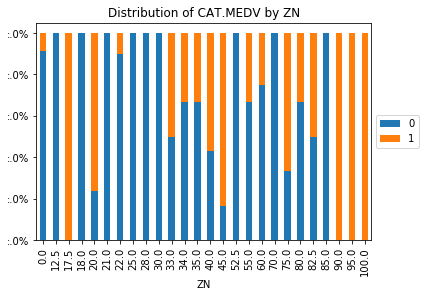

In [68]:
ax = propTbl.transpose().plot(kind='bar', stacked=True)
ax.set_yticklabels([':.0%'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [71]:
wine_df = pd.read_csv('./data/Wine.csv')
wine_df = wine_df.drop(columns=['Type'])


In [73]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(wine_df.dropna(axis=0))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pcsSummary_df = pd.DataFrame({
'Standard deviation': np.sqrt(pcs.explained_variance_),
'Proportion of variance': pcs.explained_variance_ratio_,
'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})

In [78]:
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,314.963156,9.980912e-01,0.998091
1,13.135268,1.735916e-03,0.999827
2,3.072151,9.495896e-05,0.999922
3,2.234095,5.021736e-05,0.999972
4,1.108533,1.236368e-05,0.999985
5,0.917095,8.462130e-06,0.999993
6,0.528179,2.806815e-06,0.999996
7,0.389077,1.523081e-06,0.999997
8,0.334809,1.127830e-06,0.999999
9,0.267773,7.214158e-07,0.999999
